In [1]:
%run PreProcessing.ipynb

Current Progress: 100.0 %


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from statistics import mode
import matplotlib.pyplot as plt

In [3]:
X = summary_data_avg[['method',
                      'inputs',
                      'variety',
                      'protection',
                      'solar_radiation',
                      'heat_units',
                      'pp2m2',
                      'organic_matter']]

y = summary_data_avg['d_lin']

X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety',
                                 'protection'], drop_first = True)

reg = LinearRegression(normalize=True).fit(X, y)
preds = reg.predict(X)
summary_data_avg['preds'] = preds

print(reg.score(X, y))

0.842718015906325


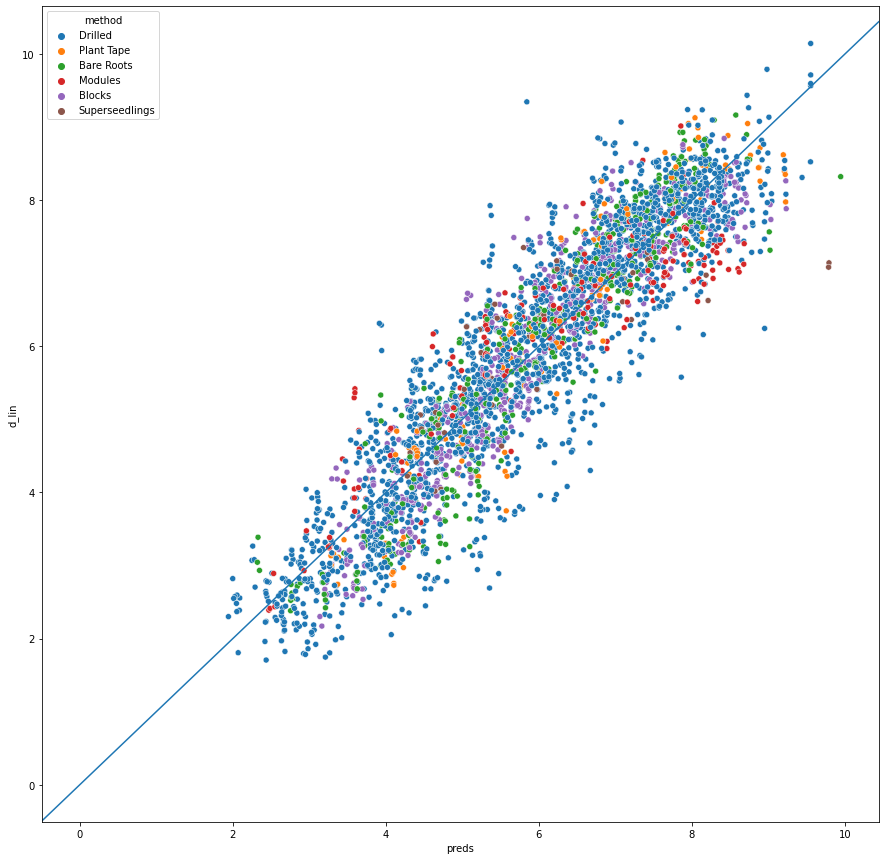

In [4]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [5]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,solar_radiation,0.000004
1,heat_units,0.000732
2,pp2m2,0.005112
3,organic_matter,0.015823
4,method_Blocks,-1.121467
5,method_Drilled,-3.738821
6,method_Modules,-0.269803
7,method_Plant Tape,-0.971248
8,method_Superseedlings,-0.537696
9,inputs_Conventional,0.755150
